In [1]:
%matplotlib inline
# Dans le cas de jeux de données de grandes dimensions, une bonne idée est de réduire le nombre de dimension 
# pour se concentrer sur celles qui apportent le plus.
# Pour sélectionner ces "bonnes" caractéristiques, on peut utiliser les stratégies suivantes : 
# - statistiques univariées
# - sélection basée sur le modèle
# - sélection itérative

In [4]:
# Dans la sélection par 📊 univariées, on cherche par analyse de variance, s'il existe une 
# relation statistiquement signifiante entre les caractéristiques prises individuellement et la 🎯 
# Les caractéristiques informatives lorsque combinées avec d'autres sont rejetées.

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np

cancer_dataset = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer_dataset.data), 50))
X_with_noise = np.hstack([cancer_dataset.data,noise])

X_train,X_test,y_train,y_test = train_test_split(X_with_noise, cancer_dataset.target,
                                                random_state=0, test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("Caracteristiques shape : {}".format(X_train.shape))
print("Caracteristiques exraites shape : {}".format(X_train_selected.shape))

Caracteristiques shape : (284, 80)
Caracteristiques exraites shape : (284, 40)


([], [])

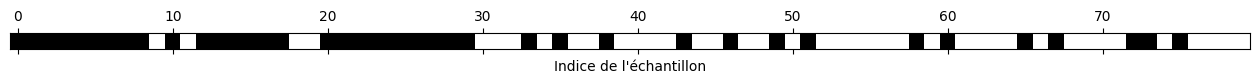

In [9]:
# Quelles sont les caractéristiques qui ont été sélectionnées ?

import matplotlib.pyplot as plt

mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Indice de l'échantillon")
plt.yticks(())

In [18]:
# Peut-on comparer les modèles d'apprentissage par régression logistique 
# sur les données avec bruit et sélectionnées ?

from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
print("Score pour les données avec bruit : {:,.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected, y_train)
print("Score pour les données sélectionnées : {:,.3f}".format(lr.score(X_test_selected,y_test)))

Score pour les données avec bruit : 0.930
Score pour les données sélectionnées : 0.940
